# Titanic Survivor Prediction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


## Libraries and Data Loading

In [63]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import skim

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [64]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## Exploratory Data Analysis

In [65]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [66]:
skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 891    │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA    ┃ NA %                    ┃ mean   ┃ sd    ┃ p0    ┃ p25  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ PassengerId     │     0 │                       0 │    450 │   260 │     1 │  220 │  670 │   890 │ ██████  │  │
│ │ Survived        │     0 │                       0 │   0.38 │  0.49 │     0 │    0 │    1 │     1 │ █    ▅  │  │
│ │ Pclass          │     0 │                       0 │    2.3 │  0.84 │     1 │    2 │    3 │     3 │ ▄  ▃ █  │  │
│ │ Age             │   177 │      19.865319865319865 │     30 │    15 │  0.42 │   20 │   38 │    80 │  ▂██▃▁  │  │
│ │ SibSp           │     0 │                       0 │   0.52 │   1.1 │     0 │    0 │    1 │     8 │    █    │  │
│ │ Parch           │     0 │                       0 │   0.38 │  0.81 │     0 │    0 │    0 │     6 │   █▁▁   │  │
│ │ Fare            │     0 │                       0 │     32 │    50 │     0 │  7.9 │   31 │   510 │    █    │  │
│ └─────────────────┴───────┴─────────────────────────┴────────┴───────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA     ┃ NA %                           ┃ words per row          ┃ total words       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                │      0 │                              0 │                    4.1 │              3626 │  │
│ │ Sex                 │      0 │                              0 │                    4.1 │              3626 │  │
│ │ Ticket              │      0 │                              0 │                    4.1 │              3626 │  │
│ │ Cabin               │    687 │              77.10437710437711 │                    4.1 │              3626 │  │
│ │ Embarked            │      2 │             0.2244668911335578 │                    4.1 │              3626 │  │
│ └─────────────────────┴────────┴────────────────────────────────┴────────────────────────┴───────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<Axes: xlabel='Survived', ylabel='count'>

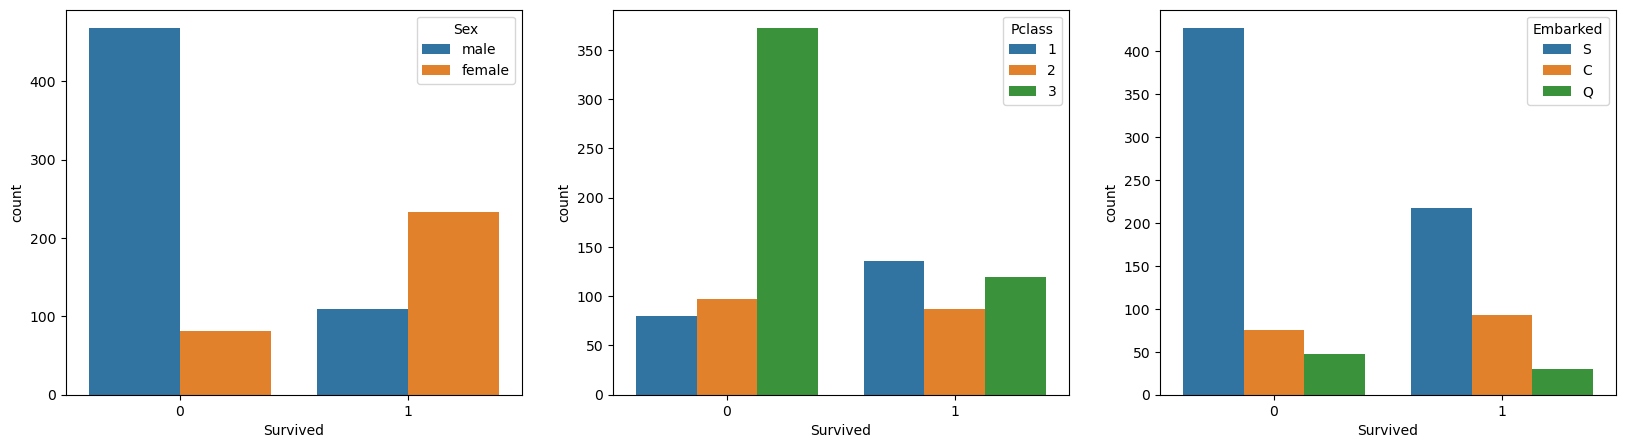

In [67]:
# Survived relation with Pclass,sex and harbor

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

sns.countplot(x='Survived', hue='Sex', data=train_df, ax=axes[0])
sns.countplot(x='Survived', hue='Pclass', data=train_df, ax=axes[1])
sns.countplot(x='Survived', hue='Embarked', data=train_df, ax=axes[2])


<Axes: xlabel='Age', ylabel='Count'>

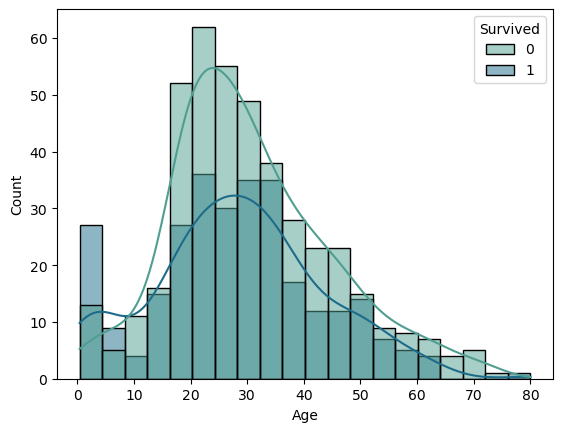

In [68]:
sns.histplot(x='Age', hue='Survived', data=train_df, kde=True, palette='crest')

<Axes: xlabel='Survived', ylabel='Fare'>

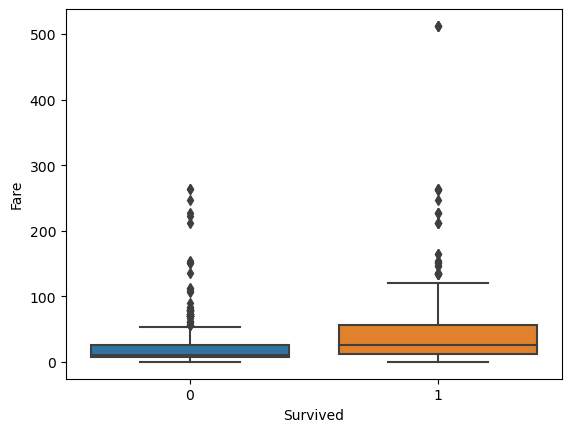

In [69]:
sns.boxplot(x='Survived', y='Fare', data=train_df)

<Axes: xlabel='Fare', ylabel='Count'>

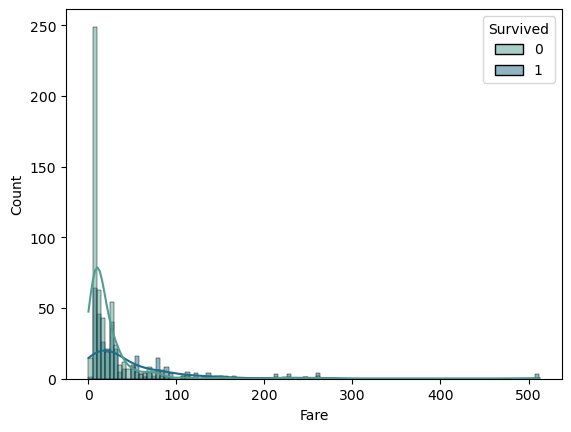

In [70]:
sns.histplot(x='Fare', hue='Survived', data=train_df, kde=True, palette='crest')

<Axes: xlabel='Fare', ylabel='Count'>

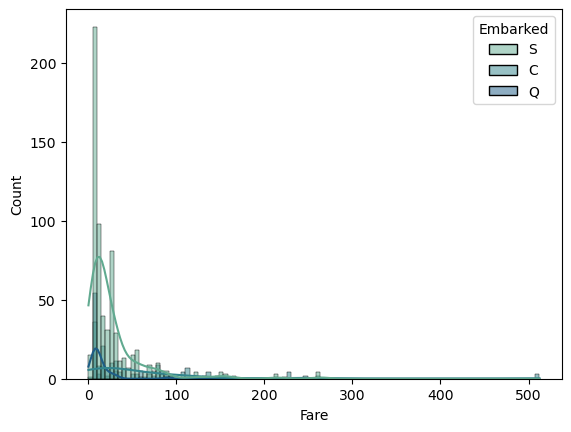

In [71]:
sns.histplot(x='Fare', hue='Embarked', data=train_df, kde=True, palette='crest')

## Data Processing


### Handle outliers and missing data

In [73]:
print(f" There is {train_df['Age'].isnull().value_counts().get(True)} passangers with no age information in the training set.")
print(f" There is {train_df['Cabin'].isnull().value_counts().get(True)} passangers with no cabin information in the training set.")
print(f" There is {train_df['Embarked'].isnull().value_counts().get(True)} passangers with no embarked information in the training set.")
print(f" There is {train_df['Fare'].isnull().value_counts().get(True)} passangers with no fare information in the training set.\n")

print(80*'*', '\n')

print(f" There is {test_df['Age'].isnull().value_counts().get(True)} passangers with no age information in the test set.")
print(f" There is {test_df['Cabin'].isnull().value_counts().get(True)} passangers with no cabin information in the test set.")
print(f" There is {test_df['Embarked'].isnull().value_counts().get(True)} passangers with no embarked information in the test set.")
print(f" There is {test_df['Fare'].isnull().value_counts().get(True)} passangers with no fare information in the test set.")

 There is 177 passangers with no age information in the training set.
 There is 687 passangers with no cabin information in the training set.
 There is 2 passangers with no embarked information in the training set.
 There is None passangers with no fare information in the training set.

******************************************************************************** 

 There is 86 passangers with no age information in the test set.
 There is 327 passangers with no cabin information in the test set.
 There is None passangers with no embarked information in the test set.
 There is 1 passangers with no fare information in the test set.


In [74]:
# Fill missing age with mean
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

# Drop cabin because 77.7% of the data is missing this information
train_df.drop('Cabin', axis=1, inplace=True)

# Fill missing embarked with most common
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

# Replace Fare outliers with mean
# TODO: Use sklearn.impute.KNNImputer https://www.blog.dailydoseofds.com/p/the-most-overlooked-problem-with-768
train_df['Fare'] = np.where(train_df['Fare'] > 300, train_df['Fare'].mean(), train_df['Fare'])

In [75]:
# Fill missing age with mean
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

# Drop cabin because 77.7% of the data is missing this information
test_df.drop('Cabin', axis=1, inplace=True)

# Replace Fare outliers with mean
# TODO: Use sklearn.impute.KNNImputer https://www.blog.dailydoseofds.com/p/the-most-overlooked-problem-with-768
test_df['Fare'] = np.where(test_df['Fare'] > 300, test_df['Fare'].mean(), test_df['Fare'])
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

### Feature Scaling

In [76]:
def normalization(df, column_names):
    """Normalization of the given columns in the dataframe
        
        Method in which data points are shifted and rescaled so
        that they end up in a range of 0 to 1.
        It is also known as min-max scaling.

        Normalization is preferred over standardization when our data doesnt 
        follow a normal distribution. It can be useful in those machine learning
        algorithms that do not assume any distribution of data like the k-nearest neighbor and neural networks.
    """
    for column_name in column_names:
        df[column_name] = (df[column_name] - df[column_name].mean()) / (df[column_name].max() - df[column_name].min())
    return df

def z_norm(df, column_names):
    """ Standardization of the given columns in the dataframe
        
        Method where the values are centered around mean with a unit standard deviation.
        It means if we will calculate mean and standard deviation of standard scores it will be 0 and 1 respectively.

        z = (x - u) / s

        where:
            x = value
            u = mean
            s = standard deviation
        
        It is also known as z-score normalization.

        i.e. If Z=2, it means that the observation lies two standard deviations above the mean.

        Standardization is good to use when our data follows a normal distribution. 
        It can be used in a machine learning algorithm where we make assumptions about the distribution of data like linear regression etc
    """
    for column_name in column_names:
        df[column_name] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    return df

train_df=z_norm(train_df, ['Age', 'Fare'])

## Split Dataset

Let's get the train set and split it into 80/20 for train and validation

In [ ]:
train_df_split, val_df_split = train_test_split(train_df, test_size=0.2, random_state=42)

x_train = train_df_split.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'SibSp', 	'Parch', 'Embarked', 'Sex'], axis=1)
y_train = train_df_split['Survived']

x_val= val_df_split.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'SibSp', 	'Parch', 'Embarked', 'Sex'], axis=1)
y_val= val_df_split['Survived']